# TASK_03 : IRIS FLOWER CLASSIFICATION   

<img src = "ii.png">

In [77]:
#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

In [56]:
df=pd.read_csv('Iriss.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
#information about the dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [58]:
#describing about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [59]:
df.shape

(150, 6)

In [61]:
df.drop('Id',axis=1,inplace=True)

In [62]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [64]:
#count the value
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [25]:
#finding the null value
df.isnull().sum()

petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
label           0
dtype: int64

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

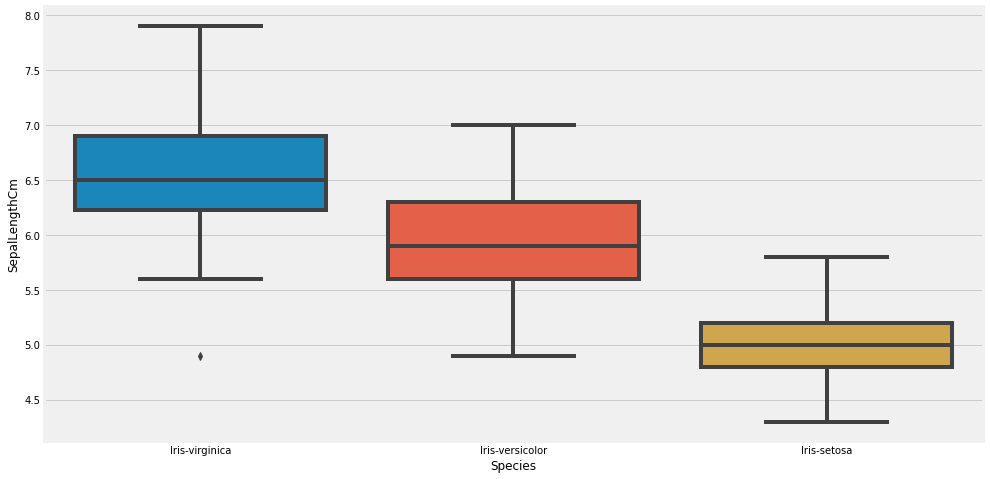

In [66]:
#Relationship between species and sepal length
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

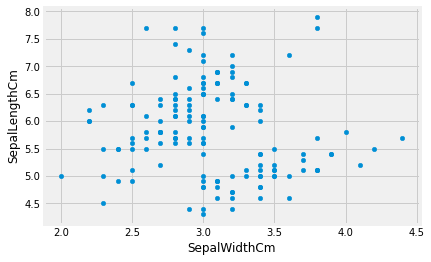

In [67]:
#Relationship between species and sepal width
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')


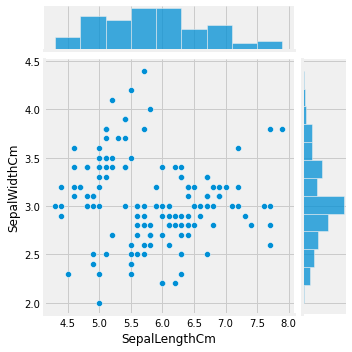

In [68]:
#Relationship between sepal width and sepal length
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

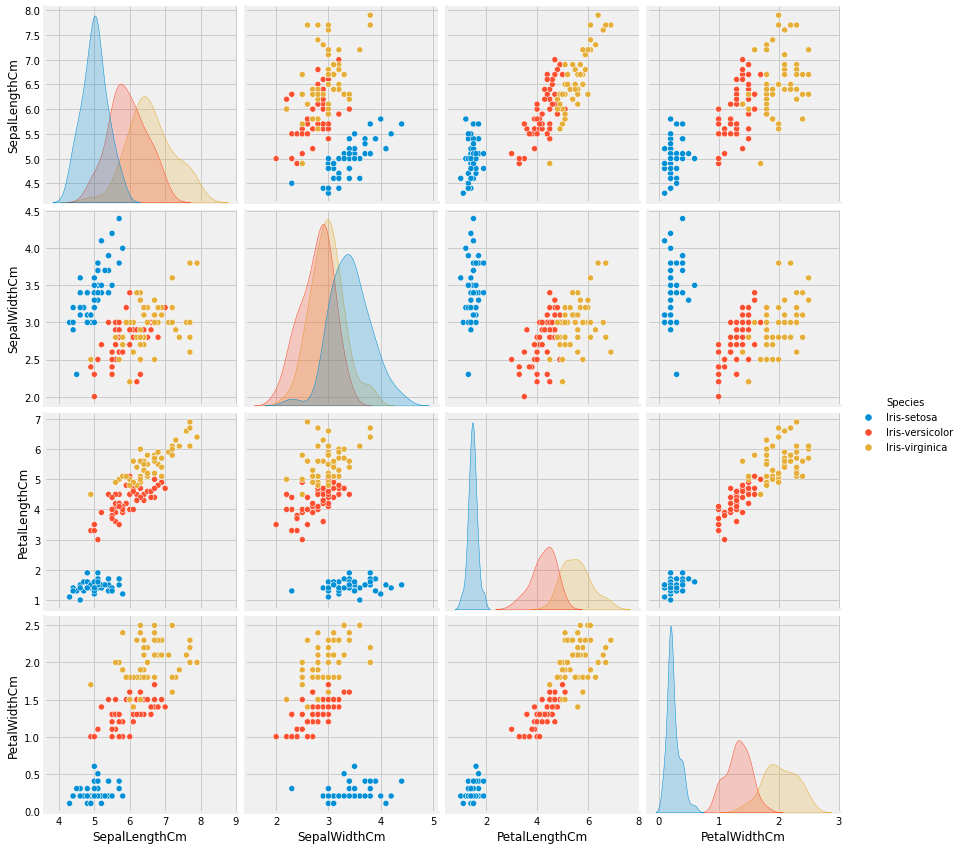

In [71]:
#Pairplot
sns.pairplot(df, hue="Species", size=3)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

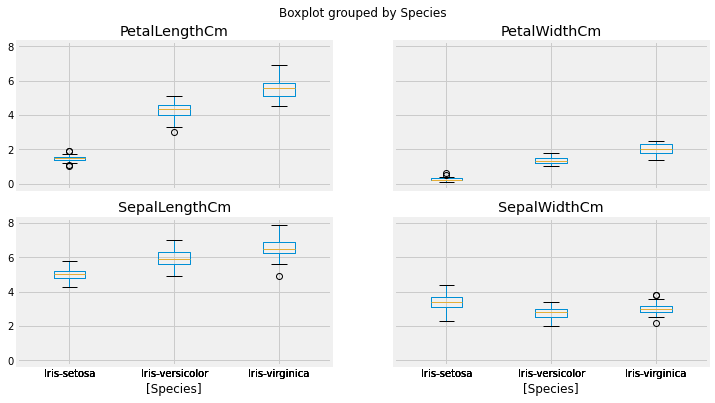

In [72]:
df.boxplot(by="Species", figsize=(12, 6))

<AxesSubplot:>

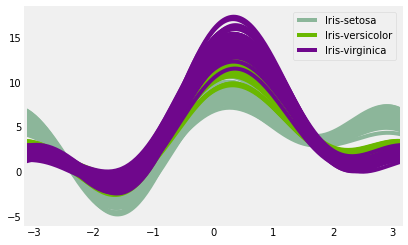

In [73]:
#Andrews_curves
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

<Figure size 1080x1080 with 0 Axes>

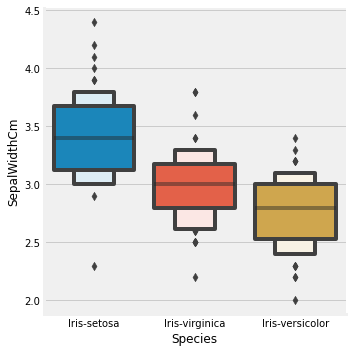

In [74]:
#CategoricalPlot
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

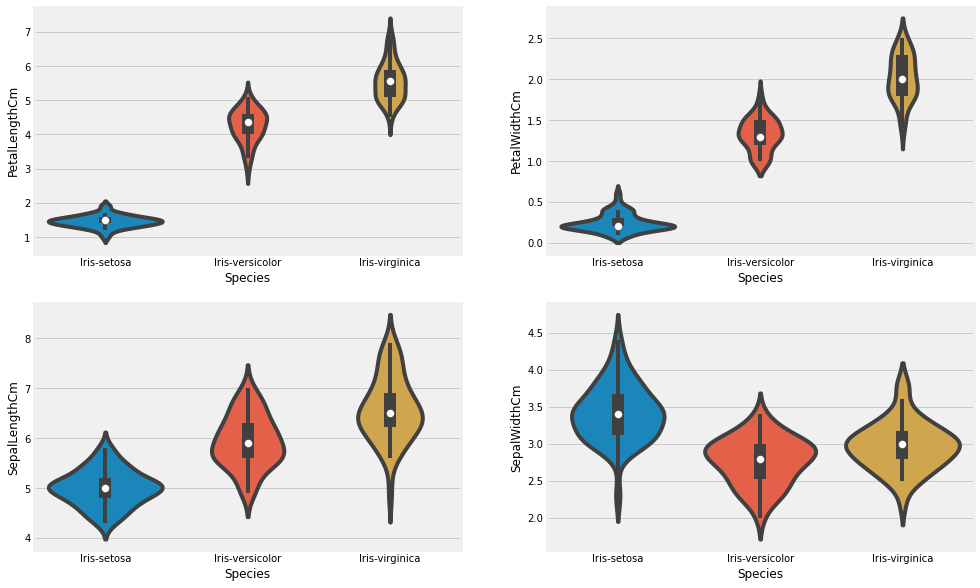

In [75]:
#Violinplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [41]:
#Neural Network
X=df.drop('label',axis=1)
y=df['label']

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [43]:
df['label'] = pd.Categorical(df.label)
df['label'] = df.label.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.label)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)


In [45]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 3s 159ms/step - loss: 1.2950 - accuracy: 0.0190 - val_loss: 1.1850 - val_accuracy: 0.1778
Epoch 2/45
4/4 [==============================] - 0s 29ms/step - loss: 1.1557 - accuracy: 0.2667 - val_loss: 1.1014 - val_accuracy: 0.1111
Epoch 3/45
4/4 [==============================] - 0s 23ms/step - loss: 1.1001 - accuracy: 0.1714 - val_loss: 1.0540 - val_accuracy: 0.3556
Epoch 4/45
4/4 [==============================] - 0s 25ms/step - loss: 1.0451 - accuracy: 0.3238 - val_loss: 1.0124 - val_accuracy: 0.3333
Epoch 5/45
4/4 [==============================] - 0s 24ms/step - loss: 1.0066 - accuracy: 0.3238 - val_loss: 0.9764 - val_accuracy: 0.3333
Epoch 6/45
4/4 [==============================] - 0s 21ms/step - loss: 0.9679 - accuracy: 0.3333 - val_loss: 0.9390 - val_accuracy: 0.2889
Epoch 7/45
4/4 [==============================] - 0s 21ms/step - loss: 0.9330 - accuracy: 0.3429 - val_loss: 0.9036 - val_accuracy: 0.5556
Epoch 8/45
4/4 [==========

In [48]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 0s 53ms/step - loss: 0.4192 - accuracy: 0.8190 - val_loss: 0.4168 - val_accuracy: 0.8444
Epoch 2/45
4/4 [==============================] - 0s 24ms/step - loss: 0.4088 - accuracy: 0.9143 - val_loss: 0.4104 - val_accuracy: 0.9778
Epoch 3/45
4/4 [==============================] - 0s 26ms/step - loss: 0.4051 - accuracy: 0.9714 - val_loss: 0.4061 - val_accuracy: 0.9778
Epoch 4/45
4/4 [==============================] - 0s 27ms/step - loss: 0.3992 - accuracy: 0.9524 - val_loss: 0.4017 - val_accuracy: 0.8667
Epoch 5/45
4/4 [==============================] - 0s 24ms/step - loss: 0.3990 - accuracy: 0.9048 - val_loss: 0.3997 - val_accuracy: 0.8444
Epoch 6/45
4/4 [==============================] - 0s 24ms/step - loss: 0.3914 - accuracy: 0.9143 - val_loss: 0.3918 - val_accuracy: 0.9111
Epoch 7/45
4/4 [==============================] - 0s 25ms/step - loss: 0.3828 - accuracy: 0.9333 - val_loss: 0.3872 - val_accuracy: 0.9778
Epoch 8/45
4/4 [===========

In [49]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.2592 - accuracy: 0.9556


[0.2591933012008667, 0.9555555582046509]

In [50]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 264ms/step
[[4.0245615e-03 4.8453641e-01 5.1143903e-01]
 [9.2560291e-01 7.2797082e-02 1.5998895e-03]
 [3.5676453e-02 7.4288690e-01 2.2143671e-01]
 [1.5605194e-02 7.0792997e-01 2.7646473e-01]
 [9.6610618e-01 3.3289902e-02 6.0396316e-04]
 [3.1927353e-04 1.6945463e-01 8.3022612e-01]
 [4.3424051e-03 4.5044035e-01 5.4521728e-01]
 [5.0809872e-03 5.5743730e-01 4.3748173e-01]
 [4.2147125e-04 2.0426978e-01 7.9530877e-01]
 [3.2910469e-04 1.3807613e-01 8.6159474e-01]]


In [51]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 0 1 1 0 2 2 1 2 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [52]:
history.history['accuracy']

[0.8190476298332214,
 0.9142857193946838,
 0.9714285731315613,
 0.9523809552192688,
 0.9047619104385376,
 0.9142857193946838,
 0.9333333373069763,
 0.9714285731315613,
 0.961904764175415,
 0.9714285731315613,
 0.9523809552192688,
 0.9523809552192688,
 0.961904764175415,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.961904764175415,
 0.9714285731315613,
 0.961904764175415,
 0.961904764175415,
 0.961904764175415,
 0.9714285731315613]

In [53]:
history.history['val_accuracy']

[0.8444444537162781,
 0.9777777791023254,
 0.9777777791023254,
 0.8666666746139526,
 0.8444444537162781,
 0.9111111164093018,
 0.9777777791023254,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9555555582046509,
 0.9333333373069763,
 0.9333333373069763,
 0.9555555582046509,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 0.9777777791023254,
 1.0,
 0.9555555582046509]

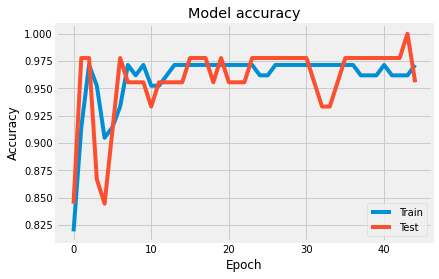

In [54]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()
